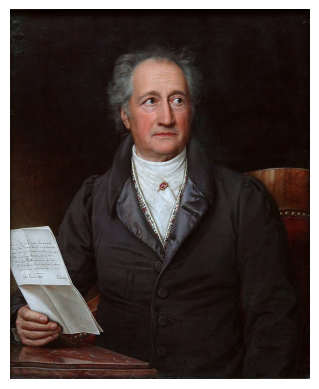

In [9]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

image = imread('Goethe.jpg')
tensor_representation = np.array(image)

plt.axis('off')
plt.imshow(image)

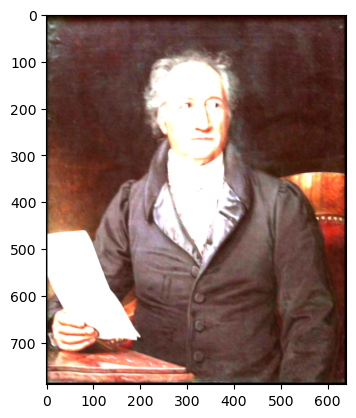

In [31]:
# def convolution_grid(x_pos, y_pos):
#     grid = np.fill
#     return  

def convolution(picture: np.array):
    LENGTH, WIDTH, DEPTH = picture.shape
    convoluted_image = np.zeros(picture.shape)

    # CONVOLUTION_MATRIX = np.array(
    #     [[1, 2, 1],
    #      [2, 4, 2],
    #      [1, 2, 1]]
    # ) / 16

    # CONVOLUTION_MATRIX = np.array(
    #     [[0, -1, 0], 
    #      [-1, 5, -1], 
    #      [0, -1, 0]]
    # )


    # Example 6x6 motion blur filter
    motion_blur_filter = np.array([
        [1, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1]
    ]) / 6  # Normalize to ensure average intensity

    CONVOLUTION_MATRIX = np.array(
        [[1, 1, 1, 1, 1, 1], 
        [1, 1, 1, 1, 1, 1], 
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1], 
        [1, 1, 1, 1, 1, 1], 
        [1, 1, 1, 1, 1, 1],]
        ) / 36

    for k in range(DEPTH):
        for i in range(3, LENGTH - 3):
            for j in range(3, WIDTH - 3):
                window = picture[i-3:i+3, j-3:j+3, k]
                convoluted_image[i, j, k] = np.sum(window * motion_blur_filter)
    convoluted_image = np.clip(convoluted_image, 0, 255)
    return convoluted_image

convoluted_image = convolution(tensor_representation)
color_image = convoluted_image.astype(np.uint8)
plt.imshow(color_image)
